<a href="https://colab.research.google.com/github/hrd1409/python-ml-projects/blob/master/OnlinesalesEDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## **Data Collection and exploartion**

In [6]:
data = pd.read_csv('/content/Diwali Sales Data Raw.csv', header= 0,
                        encoding= 'unicode_escape')

In [7]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
data.shape

(11251, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


## **Data Cleaning**

In [14]:
data.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [16]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## **EDA**

In [20]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

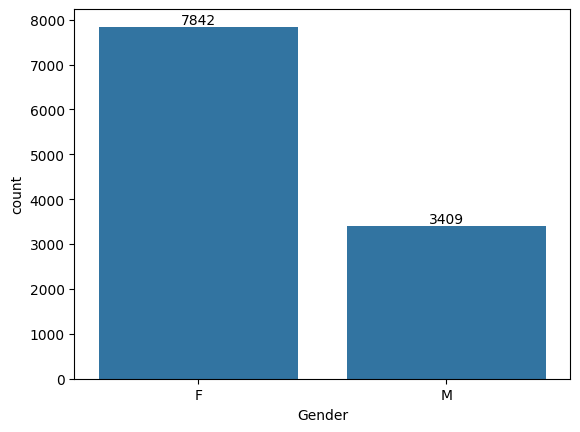

In [22]:
plot=sns.countplot(x = 'Gender',data = data)
for bars in plot.containers:
    plot.bar_label(bars) # for values

It is clear that females are higher in terms of number compared to males.

In [25]:
data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


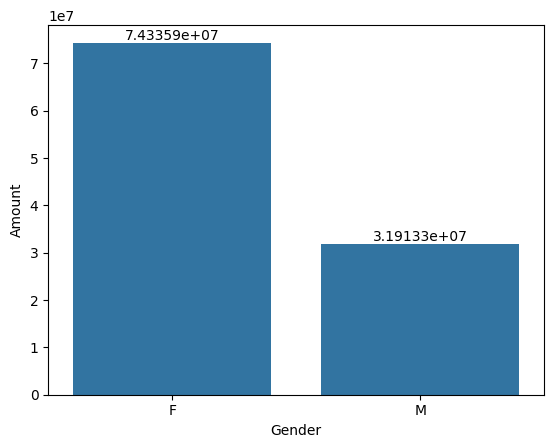

In [27]:
sales_gen = data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

a=sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)
for bars in a.containers:
    a.bar_label(bars) # for values

Same as numbers, females had spent almost thrice more according to males.

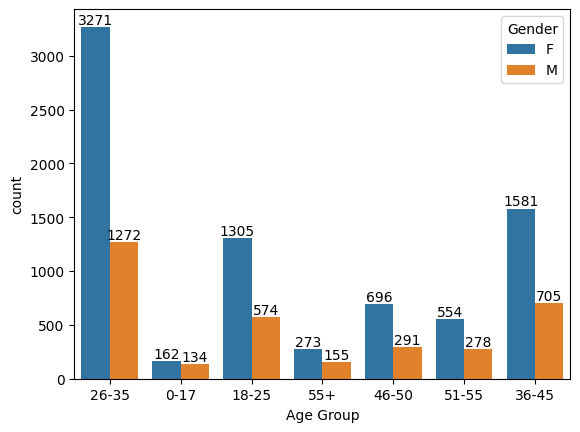

In [30]:
agewise = sns.countplot(data = data, x = 'Age Group', hue = 'Gender')
for bars in agewise.containers:
    agewise.bar_label(bars)

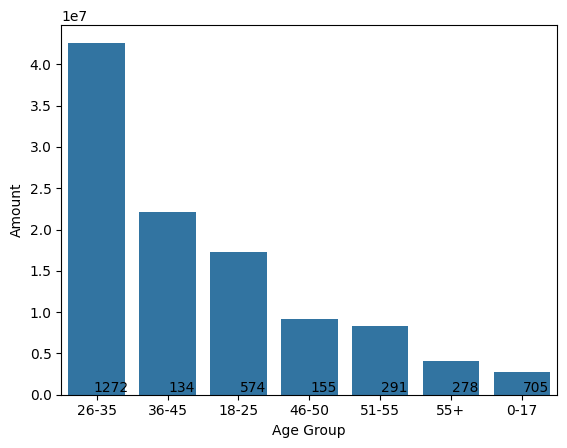

In [33]:
# Total Amounnt vs Age Group
sales_age = data.groupby(['Age Group'], as_index  = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
b=sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)
for bar in b.containers:
  b.bar_label(bars)

Age Group 26-35 is most active in shopping as seen in above plot and 0-17(minors) are the least active.

<Axes: xlabel='State', ylabel='Orders'>

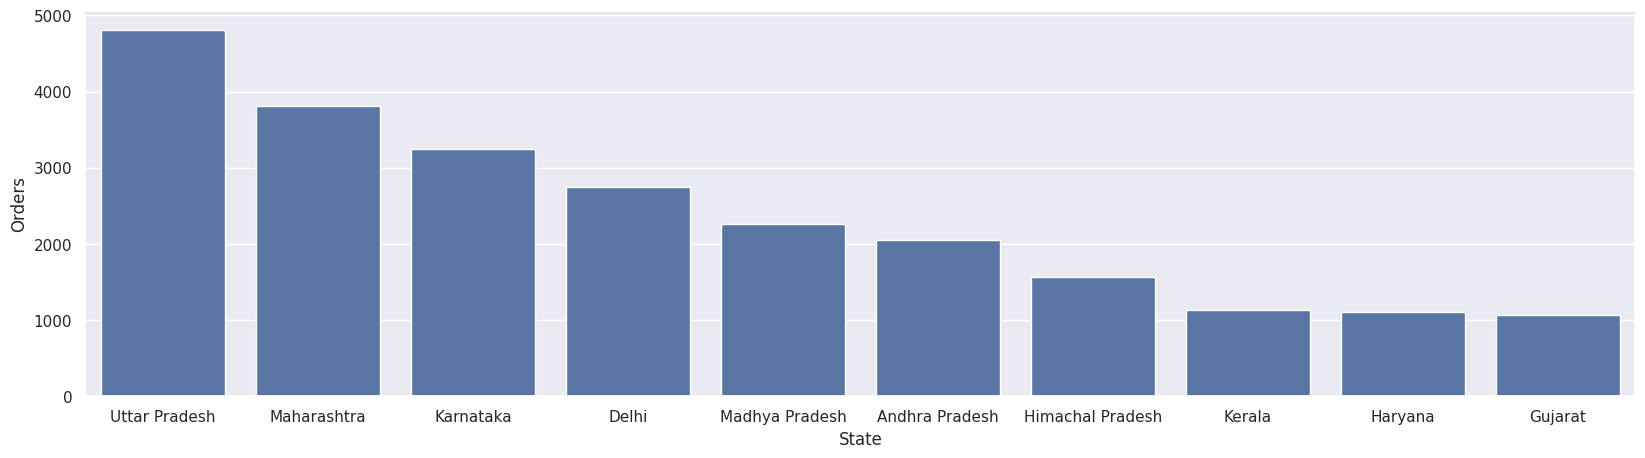

In [42]:
#Total numbers of orders from top 10 sstates.
sales_state = data.groupby(['State'], as_index =  False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

Uttar Pradesh followed by Maharashtra have highest number of orders and least order were placed by people of Gujrat and Haryana

<Axes: xlabel='State', ylabel='Amount'>

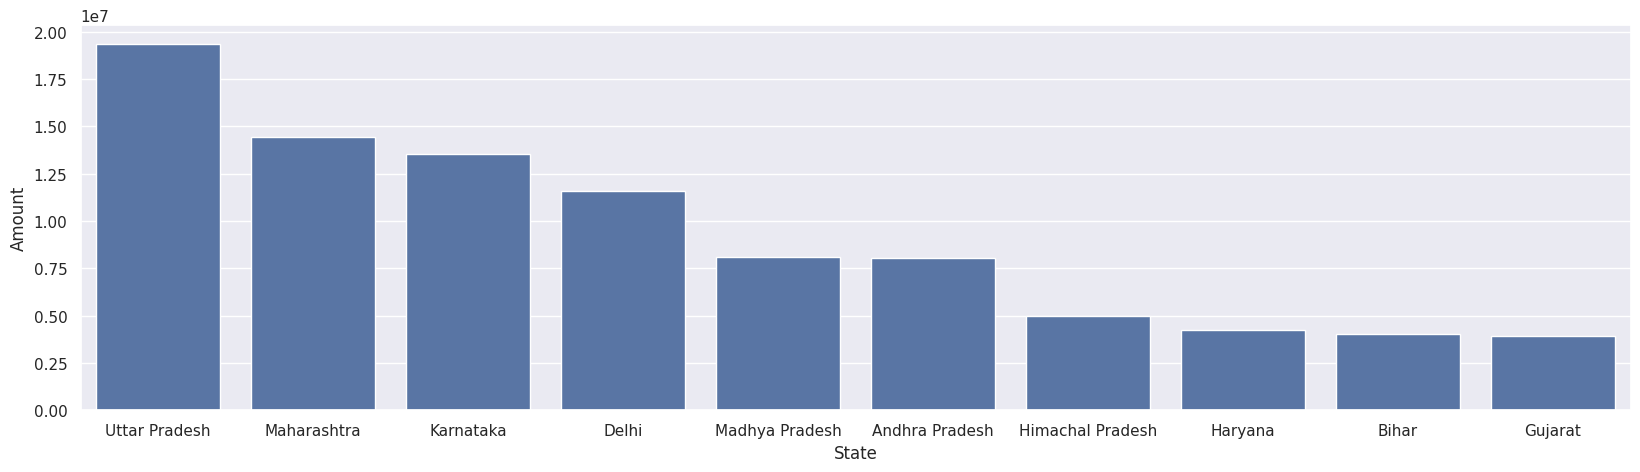

In [43]:
#Total numbers of orders from top 10 Amount.
sales_state = data.groupby(['State'], as_index =  False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

## **Maritial Status**

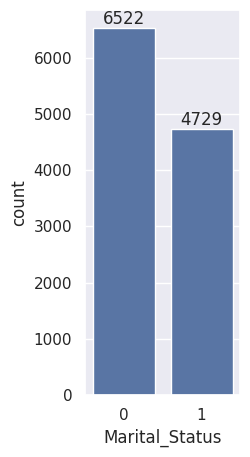

In [47]:
c=sns.countplot(x='Marital_Status',data=data)
sns.set(rc = {'figure.figsize':(2, 2)})
for bars in c.containers:
    c.bar_label(bars) # for values

<Axes: xlabel='Marital_Status', ylabel='Amount'>

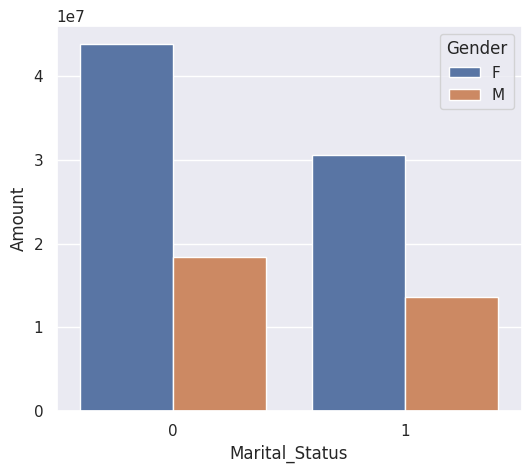

In [48]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index =  False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

Unmarried women spent more money according to married women and same for males as well.

## **Occupation**

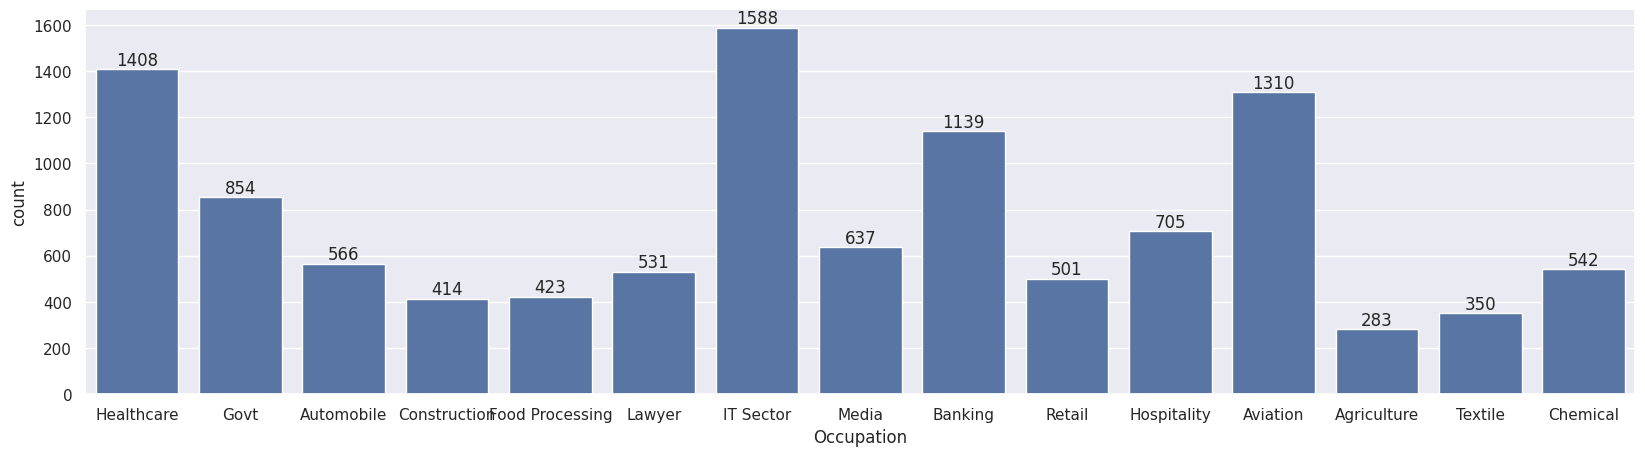

In [49]:
sns.set(rc = {'figure.figsize':(20,5)})

ax = sns.countplot(data = data, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

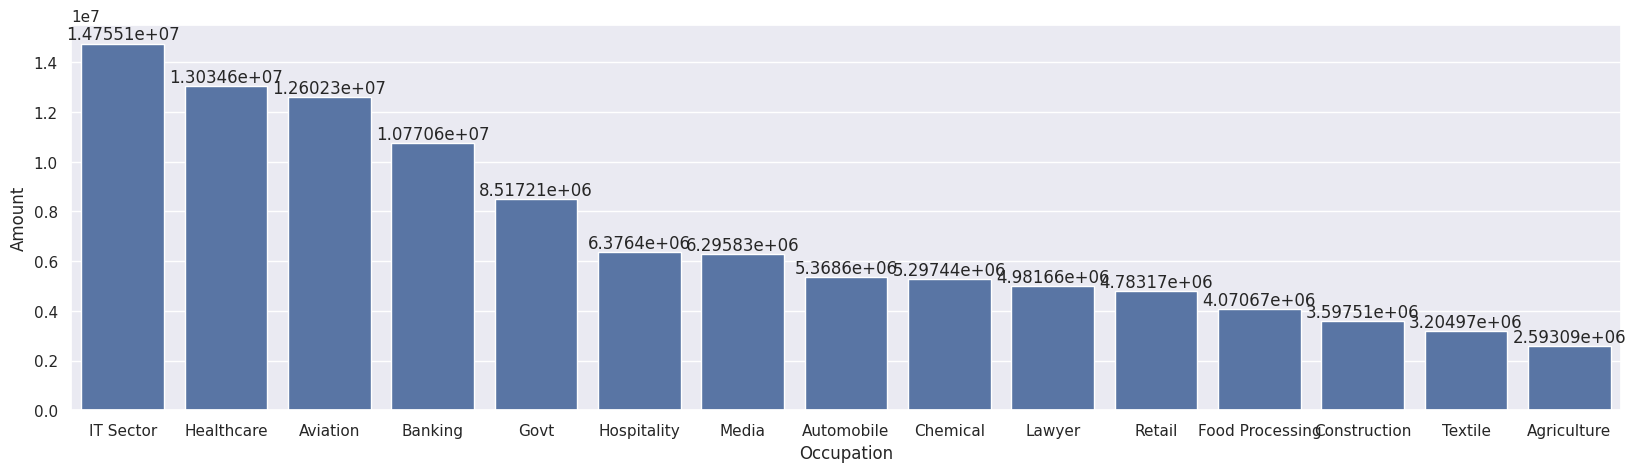

In [55]:
sales_state = data.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize':(20,5)})
d=sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')
for bars in d.containers:
  d.bar_label(bars)


It Sector,healthcare,Aviation are most hot occupation for doing online shopping in comparison with other kind of occupation and Textile and Agriculture occuoation contributes the least.

<Axes: xlabel='Product_Category', ylabel='count'>

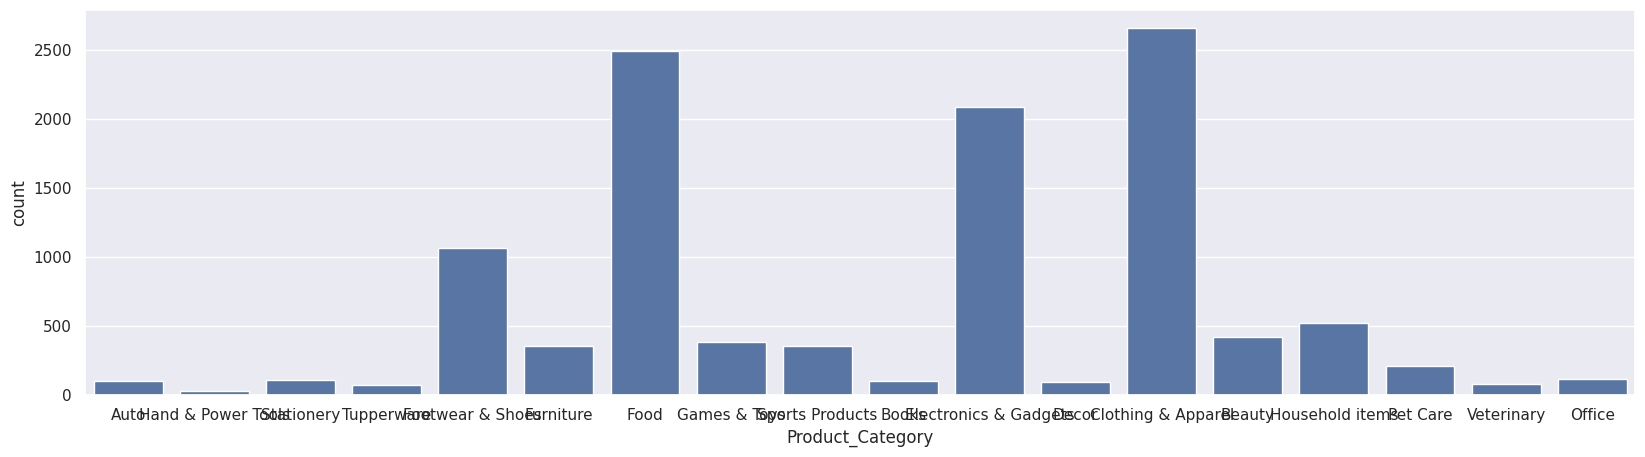

In [57]:
sns.countplot(x="Product_Category",data=data)

<Axes: xlabel='Product_Category', ylabel='Amount'>

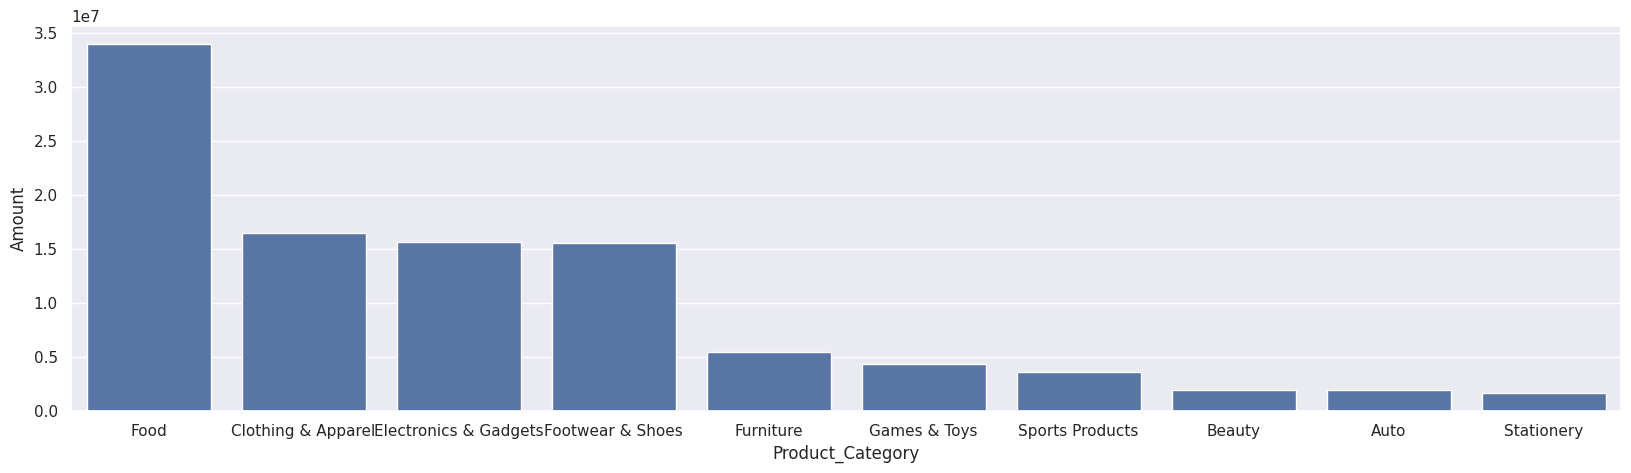

In [58]:
sales_state = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount')

Maximum amount of money was spent on food and clothing & Apparel.